In [1]:
#pip install tensorflow-gpu --user

In [2]:
#!pip install pycaret

In [3]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

In [4]:
attr = pd.read_csv(r'C:\Users\Admin\Desktop\data work chinar\Final project\ibm-hr-analytics-employee-attrition-performance/attrition.csv',encoding='utf-8')

In [5]:
attrition= pd.DataFrame(attr)

In [6]:
attrition.replace(" ", "")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


after removing the whitespaces from the data we see that the data has 1470 entries in 35 columns. 
there are no null values.
There are 9 catogrical columns and rest being numerical
will check for duplicate or 0 values 

In [10]:
for i in attrition.columns:
    print(attrition[i].value_counts())
    print('\n')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

In [11]:
attrition.drop_duplicates
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


output"Attrition" is imbalanced so will have to balance it before processing. we see 3 main departments R&D, Sale & HR, employee count 1470

# Will vizualise some comparisons to understand the gender balance department years in firm and job role.

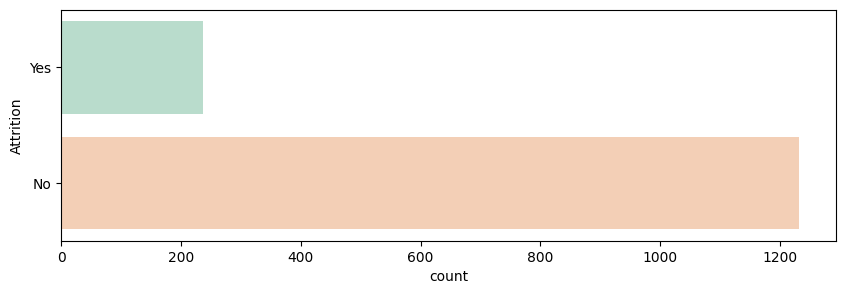

In [12]:
plt.figure(figsize=(10,3))
sns.countplot(y='Attrition', data= attrition,palette='Pastel2')
plt.show()

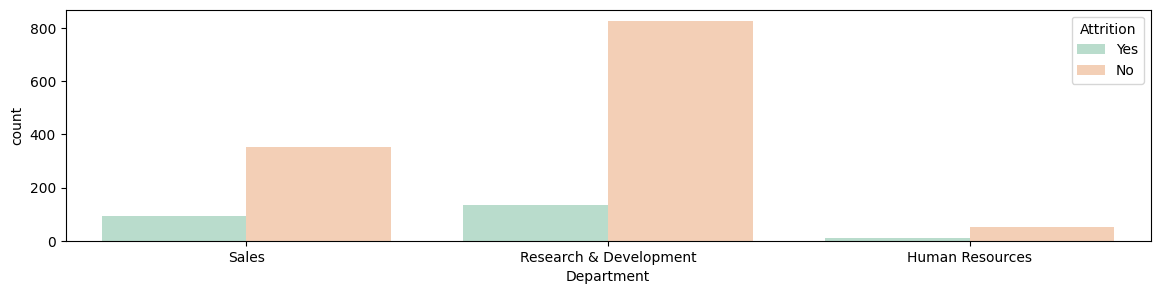

In [13]:
plt.figure(figsize=(14,3))
sns.countplot(x='Department', hue='Attrition', data= attrition,palette='Pastel2')
plt.show()

In [14]:
attrition['Gender'].value_counts()
attrition.groupby(['Gender', 'Department']).agg({"EmployeeCount":"sum"})

EmployeeCount
Gender Department                           
Female Human Resources                    20
       Research & Development            379
       Sales                             189
Male   Human Resources                    43
       Research & Development            582
       Sales                             257

R&D team has more number of employees followed by sales then HR

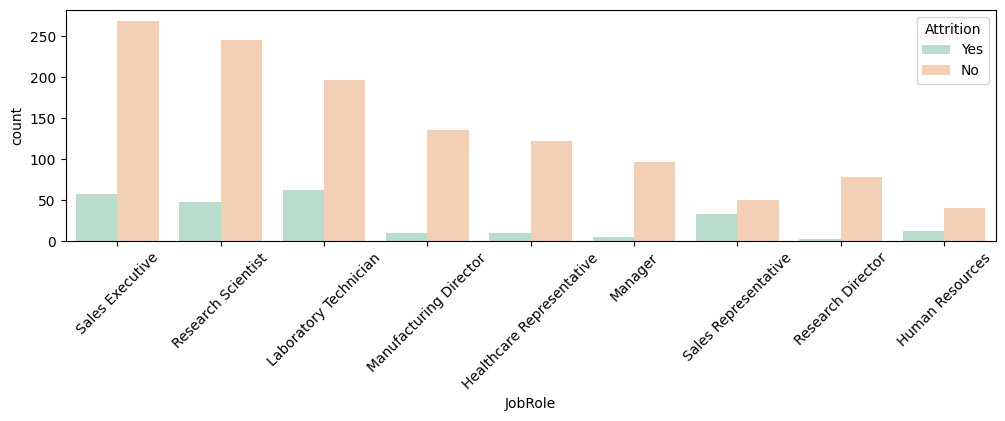

In [15]:
plt.figure(figsize=(12,3))
plt.xticks(rotation=45)
sns.countplot(x='JobRole', hue='Attrition', data= attrition,palette='Pastel2')
plt.show()

In [16]:
attrition['JobRole'].value_counts()
attrition.groupby(['JobRole', 'Gender']).agg({"EmployeeCount":"sum"})

EmployeeCount
JobRole                   Gender               
Healthcare Representative Female             51
                          Male               80
Human Resources           Female             16
                          Male               36
Laboratory Technician     Female             85
                          Male              174
Manager                   Female             47
                          Male               55
Manufacturing Director    Female             72
                          Male               73
Research Director         Female             33
                          Male               47
Research Scientist        Female            114
                          Male              178
Sales Executive           Female            132
                          Male              194
Sales Representative      Female             38
                          Male               45

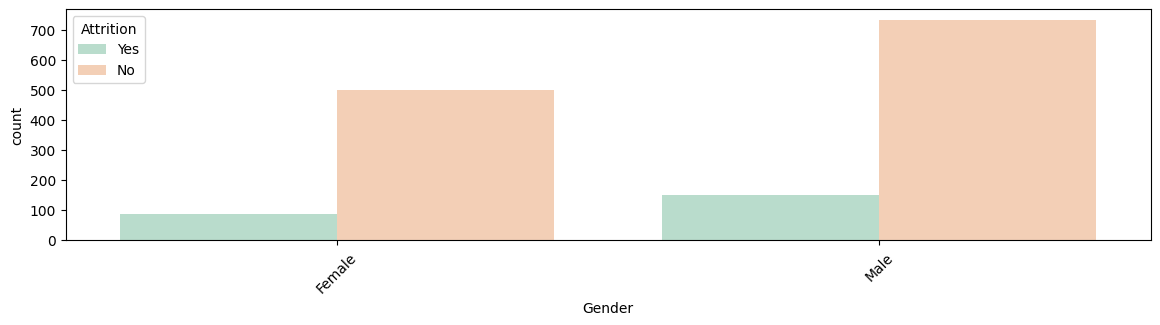

In [17]:
plt.figure(figsize=(14,3))
plt.xticks(rotation=45)
sns.countplot(x='Gender', hue='Attrition', data= attrition,palette='Pastel2')
plt.show()

In [18]:
attrition['Gender'].value_counts()
attrition.groupby(['Gender', 'Attrition']).agg({"EmployeeCount":"sum"})

EmployeeCount
Gender Attrition               
Female No                   501
       Yes                   87
Male   No                   732
       Yes                  150

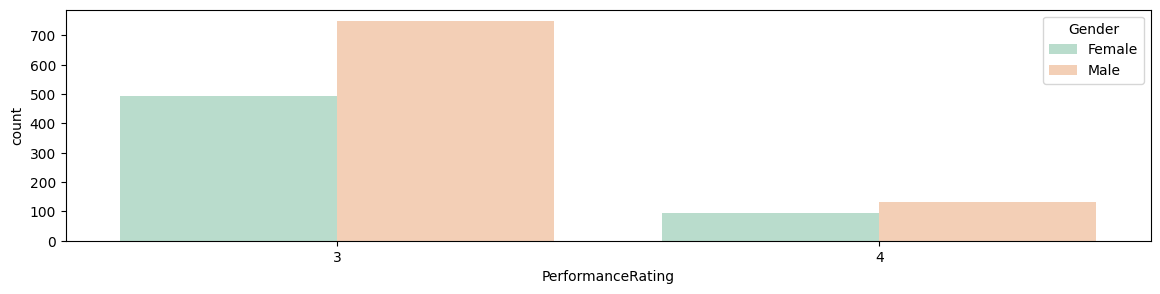

In [19]:
plt.figure(figsize=(14,3))
sns.countplot(x='PerformanceRating', hue='Gender', data= attrition,palette='Pastel2')
plt.show()

In [20]:
attrition['Gender'].value_counts()
attrition.groupby(['Gender', 'PerformanceRating']).agg({"EmployeeCount":"sum"})

EmployeeCount
Gender PerformanceRating               
Female 3                            494
       4                             94
Male   3                            750
       4                            132

In [21]:
print(f'Meeting expectations in Females',494/(494+94))
print(f'Meeting expectations in Males',750/(750+132))
print(f'Attrition% in Females',87/(501+87))
print(f'Attrition% in Males',150/(732+150))

Meeting expectations in Females 0.8401360544217688
Meeting expectations in Males 0.8503401360544217
Attrition% in Females 0.14795918367346939
Attrition% in Males 0.17006802721088435


we can say that attrition in male is slightly higher that fall in average performance rating

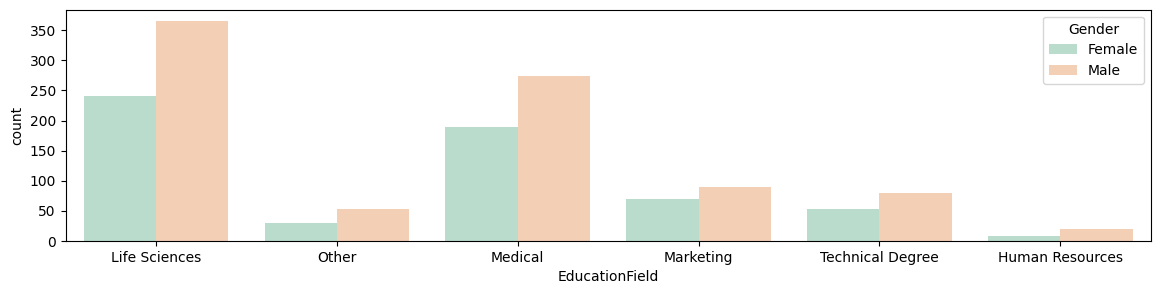

In [22]:
plt.figure(figsize=(14,3))
sns.countplot(x='EducationField', hue='Gender', data= attrition,palette='Pastel2')
plt.show()

In [23]:
attrition['Gender'].value_counts()
attrition.groupby(['Gender', 'EducationField']).agg({"EmployeeCount":"sum"})

EmployeeCount
Gender EducationField                 
Female Human Resources               8
       Life Sciences               240
       Marketing                    69
       Medical                     190
       Other                        29
       Technical Degree             52
Male   Human Resources              19
       Life Sciences               366
       Marketing                    90
       Medical                     274
       Other                        53
       Technical Degree             80

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
numeric=attrition.select_dtypes('int64')
numeric

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [27]:
category=attrition.select_dtypes('object')
category

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [28]:
for column in category:
    attrition[column]=le.fit_transform(category[column])    

In [29]:
category

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [30]:
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [31]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

# Training and testing the data

In [32]:
X=attrition.drop(['Attrition'],axis=1)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [33]:
y=attrition.iloc[:,1]
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from time import time
from sklearn import metrics
from xgboost import XGBClassifier
from yellowbrick.classifier import ROCAUC

In [35]:
x_train,x_test,y_train,y_test =train_test_split(X,y, test_size=0.30, random_state=42)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 34)
(441, 34)
(1029,)
(441,)


In [37]:
classification = [
    RandomForestClassifier(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    XGBClassifier(),
]

In [38]:
head = 12
for model in classification[:head]:
    start = time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    train_time = time() - start
    start = time()
    predict_time = time()-start
    print(model)
    print("\tAccuracy Score:", accuracy_score(y_test, y_pred))
    print("\tConfusion Matrix:", confusion_matrix(y_test, y_pred))
    score = cross_val_score(model,x_train, y_train)
    print(score)
    print(score.mean())
    print("Difference btw accurancy and CV score is  ",accuracy_score(y_test, y_pred) - score.mean())


RandomForestClassifier()
	Accuracy Score: 0.8662131519274376
	Confusion Matrix: [[376   4]
 [ 55   6]]
[0.86893204 0.84951456 0.83980583 0.83495146 0.85853659]
0.8503480937721999
Difference btw accurancy and CV score is   0.015865058155237755
QuadraticDiscriminantAnalysis()
	Accuracy Score: 0.7959183673469388
	Confusion Matrix: [[332  48]
 [ 42  19]]
[0.80582524 0.82524272 0.7961165  0.77669903 0.8195122 ]
0.8046791380535165
Difference btw accurancy and CV score is   -0.00876077070657777
DecisionTreeClassifier()
	Accuracy Score: 0.7664399092970522
	Confusion Matrix: [[319  61]
 [ 42  19]]
[0.7961165  0.81553398 0.77669903 0.7961165  0.77560976]
0.7920151551030074
Difference btw accurancy and CV score is   -0.02557524580595516
ExtraTreesClassifier()
	Accuracy Score: 0.8707482993197279
	Confusion Matrix: [[379   1]
 [ 56   5]]
[0.84951456 0.84951456 0.84466019 0.84466019 0.85853659]
0.8493772199857921
Difference btw accurancy and CV score is   0.021371079333935783
AdaBoostClassifier()
	A

based on the outputs AdaBoostClassifier is the good model

# Hyperparameter tunning

In [39]:
x_train_res,x_test_res,y_train_res,y_test_res = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
ada = AdaBoostClassifier()
param_grid = {
'n_estimators':[50,10,60],
'random_state':[10,100,50,500],
'base_estimator':['deprecated'],
'learning_rate':[1.0,0.1],
'algorithm': ['SAMME.R']
             }

grid_search_model = GridSearchCV(ada, param_grid=param_grid)
grid_search_model.fit(x_train, y_train)
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'learning_rate': 1.0, 'n_estimators': 60, 'random_state': 10}


In [40]:
sm = SMOTE(random_state = 42) 
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',estimator=None, learning_rate=1.0, n_estimators=60,random_state=10)
ada.fit(x_train_res, y_train_res)
y_pred = ada.predict(x_test_res)
print(classification_report(y_test_res, y_pred))
print(confusion_matrix(y_test_res, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       370
           1       0.47      0.58      0.52        71

    accuracy                           0.83       441
   macro avg       0.69      0.73      0.70       441
weighted avg       0.84      0.83      0.83       441

[[323  47]
 [ 30  41]]


After applying samplying we see that RandomForestClassifier is giving good results

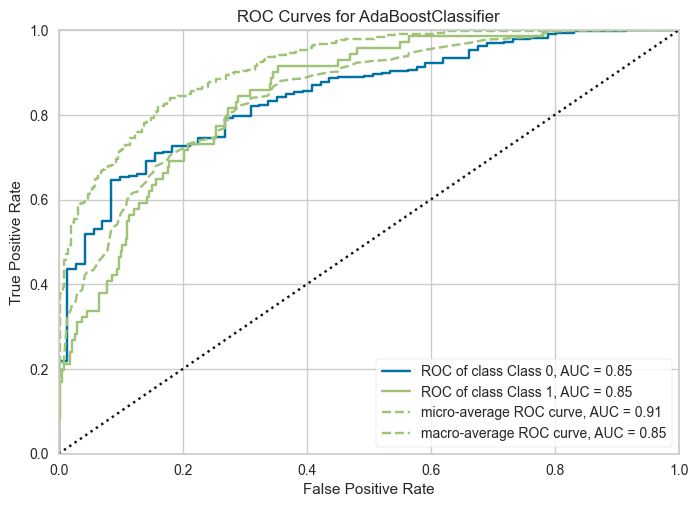

<AxesSubplot: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:

# Initialize the visualizer
visualizer = ROCAUC(ada, classes=["Class 0", "Class 1"])
visualizer.fit(x_train_res, y_train_res)
visualizer.score(x_test_res, y_test_res)
visualizer.show()

# Saving the model

In [42]:
import joblib
joblib.dump(ada,'hr_attrition.pkl')

['hr_attrition.pkl']

# Using PyCAret  

In [43]:
from pycaret.classification import *
s=setup(attrition, target = 'Attrition')

,Description,Value
0,Session id,569
1,Target,Attrition
2,Target type,Binary
3,Original data shape,"(1470, 35)"
4,Transformed data shape,"(1470, 35)"
5,Transformed train set shape,"(1029, 35)"
6,Transformed test set shape,"(441, 35)"
7,Numeric features,34
8,Preprocess,True
9,Imputation type,simple


In [44]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8688,0.8004,0.3250,0.7212,0.4380,0.3766,0.4195,0.0130
ada,Ada Boost Classifier,0.8620,0.7697,0.3357,0.6744,0.4354,0.3676,0.4031,0.0320
rf,Random Forest Classifier,0.8591,0.7652,0.1379,0.9000,0.2364,0.2040,0.3161,0.0570
ridge,Ridge Classifier,0.8581,0.0000,0.1445,0.9167,0.2425,0.2078,0.3207,0.0090
lightgbm,Light Gradient Boosting Machine,0.8561,0.7781,0.2463,0.6183,0.3426,0.2833,0.3223,0.0850
gbc,Gradient Boosting Classifier,0.8542,0.7789,0.2846,0.6044,0.3785,0.3108,0.3417,0.0780
xgboost,Extreme Gradient Boosting,0.8542,0.7578,0.2695,0.6112,0.3643,0.2982,0.3336,0.0320
et,Extra Trees Classifier,0.8513,0.7877,0.1081,0.6967,0.1845,0.1535,0.2376,0.0460
lr,Logistic Regression,0.8435,0.7624,0.1368,0.5833,0.2123,0.1623,0.2186,0.4750
dummy,Dummy Classifier,0.8387,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0050


In [45]:
print(best)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


In [46]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

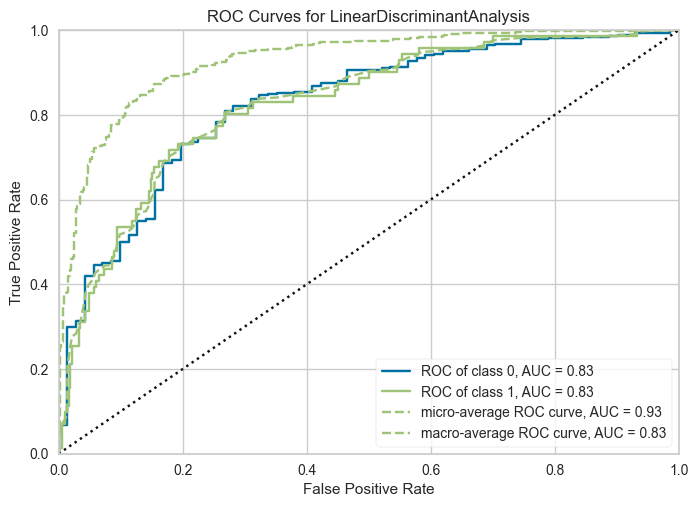

In [47]:
plot_model(best, plot = 'auc')

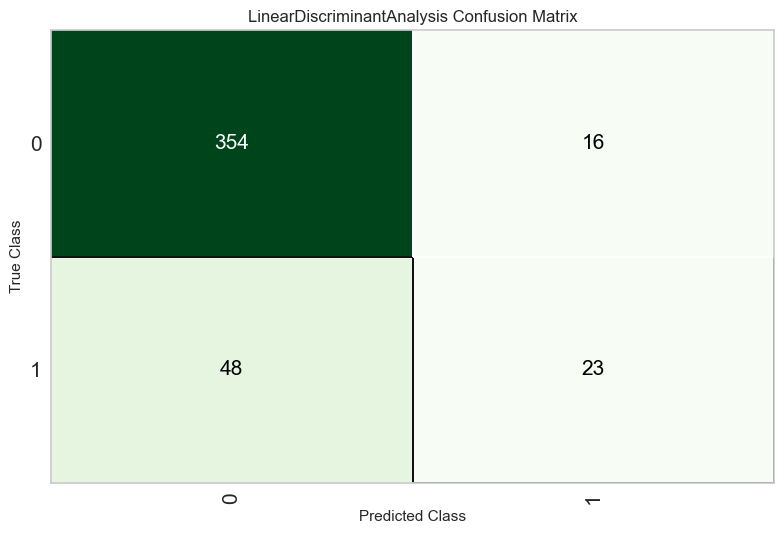

In [48]:
plot_model(best, plot = 'confusion_matrix')

In [49]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8549,0.8268,0.3239,0.5897,0.4182,0.3432,0.3634


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,prediction_label,prediction_score
398,37,0,1063,1,25,5,3,1,529,2,...,15,2,3,13,11,10,7,0,1,0.5762
332,54,1,928,1,20,4,1,1,450,4,...,20,4,2,4,3,0,3,0,0,0.9860
668,28,2,995,1,9,3,3,1,930,3,...,6,2,3,2,2,2,2,0,0,0.9554
435,33,2,1277,1,15,1,3,1,582,2,...,15,2,4,7,6,7,7,1,0,0.7268
696,45,0,805,1,4,2,1,1,972,3,...,9,5,2,9,7,0,8,0,0,0.9867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,32,2,499,2,2,1,2,1,1396,3,...,4,3,2,3,2,1,2,0,0,0.6806
964,34,2,507,2,15,2,3,1,1356,3,...,10,6,4,10,8,9,6,0,0,0.8900
224,31,0,979,1,1,4,3,1,308,3,...,6,2,3,5,4,1,4,0,0,0.8759
726,31,1,853,1,1,1,1,1,1011,3,...,4,1,3,4,3,0,3,0,0,0.9600


In [50]:
predictions = predict_model(best, data=attrition)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8653,0.8341,0.3291,0.6667,0.4407,0.3740,0.4042


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,prediction_label,prediction_score
0,41,2,1102,2,1,2,1,1,1,2,...,8,0,1,6,4,0,5,1,1,0.5474
1,49,1,279,1,8,1,1,1,2,3,...,10,3,3,10,7,1,7,0,0,0.9776
2,37,2,1373,1,2,2,4,1,4,4,...,7,3,3,0,0,0,0,1,1,0.6092
3,33,1,1392,1,3,4,1,1,5,4,...,8,3,3,8,7,3,0,0,0,0.7654
4,27,2,591,1,2,1,3,1,7,1,...,6,3,3,2,2,2,2,0,0,0.6703
